$$
\LaTeX macros
\newcommand{\pba}{{p^b_a}}
\newcommand{\de}{{\dot{e}}}
\newcommand{\dde}{{\ddot{e}}}
\newcommand{\pbd}{{p^b_d}}
\newcommand{\dpba}{{\dot{p}^b_a}}
\newcommand{\ddpba}{{\ddot{p}^b_a}}
\newcommand{\dpbd}{{\dot{p}^b_d}}
\newcommand{\ddpbd}{{\ddot{p}^b_d}}
\newcommand{\pag}{{p^a_g}}
\newcommand{\pav}{{p^a_v}}
\newcommand{\dpag}{{\dot{p}^a_g}}
\newcommand{\pai}{{p^a_i}}
\newcommand{\dpai}{{\dot{p}^a_i}}
\newcommand{\pbg}{{p^b_g}}
\newcommand{\dpbg}{{\dot{p}^b_g}}
\newcommand{\ddpbg}{{\ddot{p}^b_g}}
\newcommand{\pbi}{{p^b_i}}
\newcommand{\dpbi}{{\dot{p}^b_i}}
\newcommand{\ddpbi}{{\ddot{p}^b_i}}
\newcommand{\Rba}{{R^b_a}}
\newcommand{\dRba}{{\dot{R}{}^b_a}}
\newcommand{\ddRba}{{\ddot{R}{}^b_a}}
\newcommand{\Rab}{{R^a_b}}
\newcommand{\omaa}{{\omega^a_a}}
\newcommand{\domaa}{{\dot{\omega}{}^a_a}}
\newcommand{\Somaa}{{S\left(\omega^a_a\right)}}
\newcommand{\dSomaa}{{S\left(\dot{\omega}{}^a_a\right)}}
\newcommand{\Spag}{{S\left(p^a_g\right)}}
\newcommand{\Spai}{{S\left(p^a_i\right)}}
\newcommand{\nuaa}{{\nu^a_a}}
\newcommand{\dnuaa}{{\dot{\nu}{}^a_a}}
\newcommand{\Fb}{{F^b}}
\newcommand{\Fa}{{F^a}}
\newcommand{\Fg}{{F_g}}
\newcommand{\Fv}{{F_v}}
\newcommand{\Ng}{{N_g}}
\newcommand{\Nv}{{N_v}}
\newcommand{\Fe}{{F^{ext}}}
\newcommand{\Na}{{N^a}}
\newcommand{\iM}{{M^{-1}}}
\newcommand{\BM}{\left[\begin{matrix}}
\newcommand{\EBM}{\end{matrix}\right]}
\newcommand{\gamaa}{{\gamma^a_a}}
\newcommand{\dgamaa}{{\dot{\gamma}{}^a_a}}
\newcommand{\vx}{\vec{x}}
\newcommand{\vt}{\vec{\tau}}
\newcommand{\vn}{\vec{\nu}}
\newcommand{\T}{^\top}
\newcommand{\o}[1]{{\overline{#1}}}
\newcommand{\d}[2]{{\frac{\partial #1}{\partial #2}}}
\newcommand{\xpba}{{\,}^x{\!}p^b_a}
\newcommand{\ypba}{{\,}^y{\!}p^b_a}
\newcommand{\As}{{A^{\!*}}}
$$


In [1]:
import numpy as np
from sympy import *
t = symbols('t')
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def plot_results(sim,method='lu'):
    if method == 'lu':
        pos = sim.y[0]
        vel = sim.y[1]
        e_pos = sim.y[2]
        e_vel = sim.y[3]
    elif method == 'sm':
        pos = sim.y[1]
        vel = sim.y[0]
        e_pos = sim.y[3]
        e_vel = sim.y[2]
    fig1 = plt.figure(figsize=(20,6))
    ax1 = fig1.add_subplot(1,14,(1,4))
    ax1.plot(sim.t,pos,label='positon')
    ax1.plot(sim.t,e_pos,label='estimated position')
    ax1.legend(loc='best')
#     fig2 = plt.figure()
    ax2 = fig1.add_subplot(1,14,(6,9))
    ax2.plot(sim.t,vel,label='velocity')
    ax2.plot(sim.t,e_vel,label='estimated velocity')
    ax2.legend(loc='best')
#     fig3 = plt.figure()
    ax3 = fig1.add_subplot(1,14,(11,14))
    ax3.plot(sim.t,e_pos-pos,label='error of position')
    ax3.plot(sim.t,e_vel-vel,label='error of velocity')
    ax3.legend(loc='best')

# Observers

### State reconstruction

## Luenberger

Let the plant be described in state-variable form by:

$$
\begin{align}
\dot{x} &= A x + B u \\
y &= C x
\end{align}
$$

with state $x(t) \in \pmb{R}^n$, control input $u(t) \in \pmb{R}^m$, and output $y(t) \in \pmb{R}^p$.

Let the estimate of $x(t)$ be $\hat{x}(t)$.

$$
\begin{align}
\dot{\hat{x}} &= A \hat{x} + B u + L\left(y - \hat{y}\right) \\
\hat{y} &= C \hat{x}
\end{align}
$$

Estimation error:

$$
\begin{align}
 e & = x - \hat{x} \\
 \dot{e} & = \dot{x} - \dot{\hat{x}}
\end{align}
$$

Error dynamics:

$$
\begin{align}
 \dot{e} & = A x + B u - A \hat{x}  - B u - L\left(C x - C \hat{x} \right) \\
 \dot{e} & = A \left( x - \hat{x} \right) - L C \left( x - \hat{x}\right) \\
 \dot{e} & = \underbrace{\left( A - LC \right)}_{\Gamma} \, e
\end{align}
$$

$$
L = \,?
$$

### $(A,C)$ - observable

 - LQ (Kalman gain)
 - eigenvalue location

## Example

$$
x = \BM position \\ velocity \EBM
$$

Available measurements:
- position (eg. GPS, visual odometry)
- acceleration (eg. accelerometers)

$$
\begin{align}
\dot{x} &= \BM 0 & 1 \\ 0 & 0\EBM x + \BM 0 \\ 1\EBM u \\
y &= \BM 1 & 0 \EBM
\end{align}
$$

System:
$$
A = \BM 0 & 1 \\ 0 & 0\EBM,\, B = \BM 0 \\ 1\EBM,\, C = \BM 1 & 0 \EBM
$$

Gain structure:
$$
L = \BM l_1 \\ l_2 \EBM
$$

$$
\begin{align}
\Gamma = A-LC &= \BM 0 & 1 \\ 0 & 0\EBM - \BM l_1 \\ l_2 \EBM \BM 1 & 0 \EBM \\
&= \BM 0 & 1 \\ 0 & 0\EBM - \BM l_1 & 0 \\ l_2 & 0\EBM \\
&= \BM -l_1 & 1 \\ -l_2 & 0\EBM
\end{align}
$$

Eigenvalue location:
$$
\text{det}(\lambda I - \Gamma) = W(\lambda)
$$

$$
\begin{align}
\text{det}(\lambda I - \Gamma) &= \text{det}\left(\BM \lambda & 0 \\ 0 & \lambda \EBM - \BM -l_1 & 1 \\ -l_2 & 0\EBM \right) \\
&= \text{det}\left( \BM \lambda +l_1 & -1 \\ l_2 & \lambda \EBM \right) \\
&= \lambda^2+l_1 \lambda + l_2
\end{align}
$$


Characteristic polynomial:
$$
W(\lambda) \triangleq (\lambda - \omega_1)(\lambda - \omega_2) = \lambda^2 - (\omega_1+\omega_2)\lambda + \omega_1 \omega_2,\quad \omega_i < 0
$$

$$
\begin{align}
\text{det}(\lambda I - \Gamma) &= \lambda^2+l_1 \lambda + l_2 \\
W(\lambda) &= \lambda^2 - (\omega_1+\omega_2)\lambda + \omega_1 \omega_2
\end{align}
$$

$$
\begin{align}
l_1 &= -(\omega_1 + \omega_2) \\
l_2 &= \omega_1 \omega_2
\end{align}
$$

$$
\omega_1 = \omega_2 = -1 \rightarrow L = \BM 2 \\ 1\EBM
$$

In [2]:
p0 = 0
p = cos(t)+p0
acc = diff(p,t,2)
ctrl = lambdify((t),acc)
om1 = -1
om2 = -1
A = np.array([[0,1],[0,0]])
B = np.array([[0],[1]])
C = np.array([[1,0]])
L = np.array([[-(om1+om2)],[om1*om2]])
# display(p,acc)
# display(A,B,C,L)

In [3]:
def state_observer(u,y,est_x):
    est_dx = A @ est_x + B * u + L @ (y - C @ est_x)
    return est_dx

In [4]:
def plant(t,state):
    x = np.array([[state[0]],[state[1]]])
    est_x = np.array([[state[2]],[state[3]]])
    u = ctrl(t)
    dx = A @ x + B * u
    y = C @ x
    est_dx = state_observer(u,y,est_x)
    return np.ndarray.tolist(np.concatenate((dx,est_dx)).T)[0]

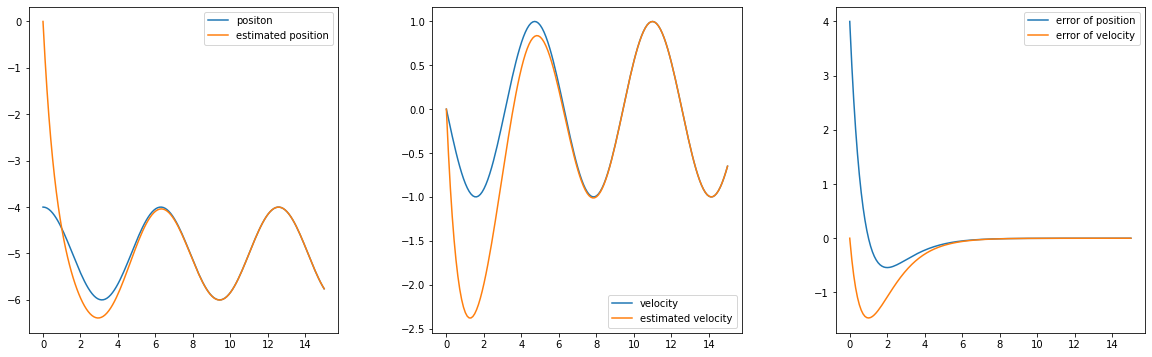

In [5]:
p0,v0,est_p0,est_v0 = -4,0,0,0
state0 = [p0,v0,est_p0,est_v0]
om1, om2 = -1,-1; L = np.array([[-(om1+om2)],[om1*om2]])
sim = solve_ivp(plant,[0,15],state0,max_step=0.1)
plot_results(sim)

## Sliding Mode Obsever

#### Basic form

$$
\begin{align}
\dot{x} &= A x + B u \\
y &= C x
\end{align}
$$

$$
C = \BM 0 & I_p\EBM, \, C \in \mathbb{R}^{p \times n}
$$

Consider a coordinate transformation $x \rightarrow T_c x$ associated with the invertible matrix:

$$
T_c = \BM N_c^T \\ C \EBM,\, \text{where} \, N_c \text{ spans the null-space of } C
$$

$$\o{A},\, \o{B},\, \o{C}\, \text{ - system before coordinate transformation}$$

$$
\begin{align}
A = T_c \o{A} T_c^{-1} = \BM A_{11} & A_{12} \\ A_{21} & A_{22}\EBM,\,
B = T_c \o{B} = \BM B_1 \\ B_2 \EBM,\, 
C = \o{C}T_c^{-1} = \BM 0 & I_p \EBM
\end{align}
$$

$$ A_{11} \in \mathbb{R}^{(n-p)\times(n-p)},\, B_1 \in \mathbb{R}^{(n-p)\times m}$$

Observer structure:

$$
\begin{align}
\dot{\hat{x}} &= A \hat{x} + B u + G \nu \\
\hat{y} &= C \hat{x}
\end{align}
$$

Error definition:

$$
\begin{align}
e & \triangleq \hat{x} - x \\
e_y &\triangleq \hat{y} - y = C (\hat{x} - x) =  \BM 0 & I_p \EBM e \\
e &= \BM e_L \\ e_y\EBM 
\end{align}
$$

Corrector:

$$
S = \{e: Ce=0\}
$$
$$
\nu_i = \rho \, \text{sign}(e_{y,i}),\, G = \BM L \\ -I_p\EBM
$$

Error dynamics:

$$
\begin{align}
\dot{e} &= A \hat{x} + B u + G \nu - A x - B u =  A e + G \nu = \BM \dot{e}_L \\ \dot{e}_y \EBM
\end{align}
$$

$$
\begin{align}
\dot{e}_L &= A_{11} e_L + A_{12} e_y + L \nu \\
\dot{e}_y &= A_{21} e_L + A_{22} e_y - \nu
\end{align}
$$

$$
\dot{e}_{y,i} = A_{21,i} e_L + A_{22,i} e_y - \rho\,\text{sign}(e_{y,i})
$$

$\eta$-reachability:

$$
\rho > | A_{21,i} e_L + A_{22,i} e_y | + \eta,\,\eta \in \mathbb{R}_+
$$

Sliding mode $e_y = \dot{e}_y = 0$

$$
\begin{align}
\dot{e}_L &= A_{11} e_L + L \nu_{eq} \\
0 &= A_{21} e_L - \nu_{eq}
\end{align}
$$

$$
\dot{e}_L = \left( A_{11} + L A_{21} \right) e_L
$$

## Example

$$
x = \BM velocity \\ position \EBM
$$

$$
\begin{align}
\dot{x} &= \BM 0 & 0 \\ 1 & 0\EBM x + \BM 1 \\ 0\EBM u \\
y &= \BM 0 & 1 \EBM
\end{align}
$$

System:
$$
A = \BM 0 & 0 \\ 1 & 0\EBM,\, B = \BM 1 \\ 0\EBM,\, C = \BM 0 & 1 \EBM
$$

$$
A_{11} + L A_{21} = L,\
$$

Maximum estimated error: $\hat{e}^{max}_L$

Gain proposition:
$$
\begin{align}
L &= -1 \rightarrow \dot{e}_L = -e_L\\
\rho &= \hat{e}^{max}_L
\end{align}
$$

$$
\begin{align}
\dot{\hat{x}} &= \BM 0 & 0 \\ 1 & 0\EBM \hat{x} + \BM 1 \\ 0\EBM u + \BM -1 \\ -1\EBM \rho \text{sign}(\hat{x}_2 - x_2) \\
\hat{y} &= C \hat{x}
\end{align}
$$

In [6]:
p0 = 0
p = cos(t)+p0
acc = diff(p,t,2)
ctrl = lambdify((t),acc)
om1 = 10
om2 = 10
A = np.array([[0,0],[1,0]])
B = np.array([[1],[0]])
C = np.array([[0,1]])
G = np.array([[-1],[-1]])
elmax = 3
rho = elmax+0.1
# display(p,acc)
# display(A,B,C,G)

In [7]:
def sm_state_observer(u,y,est_x):
    ey = C @ est_x - y
    est_dx = A @ est_x + B * u + G @ (rho * np.sign(ey))
    return est_dx

In [8]:
def sm_plant(t,state):
    x = np.array([[state[0]],[state[1]]])
    est_x = np.array([[state[2]],[state[3]]])
    u = ctrl(t)
    dx = A @ x + B * u
    y = C @ x
    est_dx = sm_state_observer(u,y,est_x)
    return np.ndarray.tolist(np.concatenate((dx,est_dx)).T)[0]

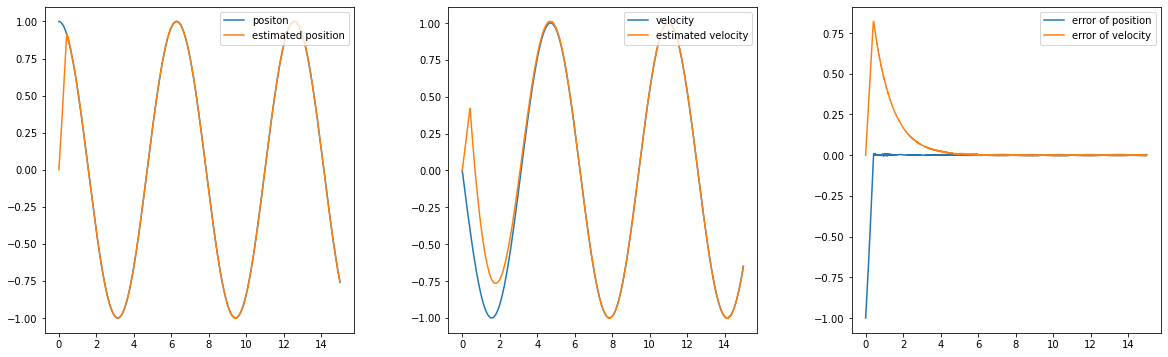

In [9]:
p0,v0,est_p0,est_v0 = 1,0,0,0
L, rho = -1,2; G = np.array([[L],[-1]])
state0 = [v0,p0,est_v0,est_p0]
sim = solve_ivp(sm_plant,[0,15],state0,max_step=0.1)
plot_results(sim,method='sm')

# Filters

## Kalman filter

## Polynomial filter

$$
\begin{align}
f(t) &= at^2+bt+c &\text{ - position}\\
\d{f(t)}{t} &= 2at+b &\text{ - velocity}\\
\d{f^2(t)}{t^2} &= 2a &\text{ - acceleration}
\end{align}
$$

## ...

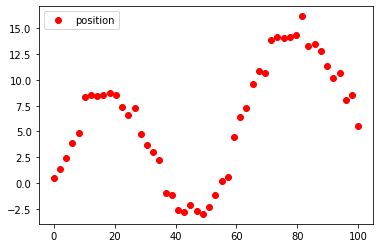

In [10]:
samples = 50
noise_amp = 3
t = np.linspace(0,100,num=samples)
noise = (np.random.rand(samples)-0.5)*noise_amp
pos = 7*np.sin(0.1*t)+0.1*t + noise
plt.plot(t,pos,'ro',label='position');plt.legend(loc='best')

$$
f(t) = \phi(t) p
$$

2-nd order polynomial:
$$
\begin{align}
\phi(t) &= \BM t^2 & t & 1\EBM\\
p &= \BM a & b & c\EBM\T
\end{align}
$$

LS method:
$$
\Phi = \BM \phi(t-n) \\ \vdots \\ \phi(t) \EBM,\, \o{f}(t) = \BM f(t-n) \\ \vdots \\ f(t) \EBM
$$

$$
\hat{p} = \left(\Phi\T\Phi\right)^{-1}\Phi\T \o{f}(t)
$$

array([ 2.25921051e-03, -1.37418329e-01,  5.47882770e+00])

Estimated velocity:  0.31442377260535137


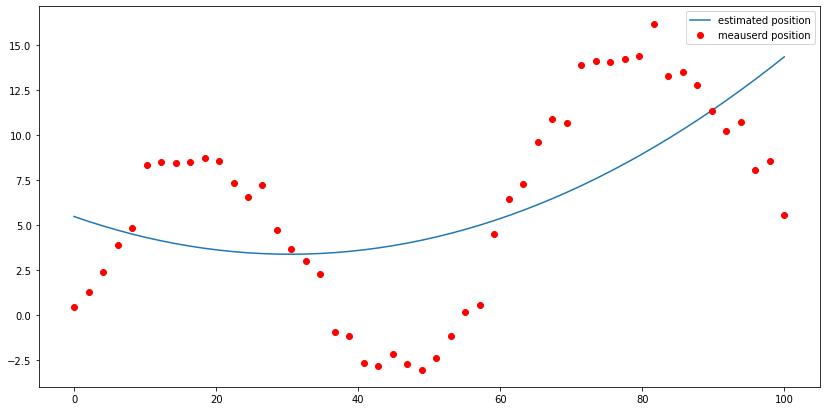

In [11]:
PHI = lambda u: np.array([u**2,u,np.ones(u.shape[0])]).T
n = samples; t_filt = t[-n:]; pos_filt = pos[-n:]
param = np.linalg.pinv(PHI(t_filt)) @ pos_filt ;display(param) # LS estimation
pos_est = lambda t: PHI(t) @ param
plt.figure(figsize=(14,7)); plt.plot(t_filt,pos_est(t_filt),label='estimated position');plt.plot(t,pos,'ro',label='meauserd position');plt.legend(loc='best')
print('Estimated velocity: ', 2*param[0]*t[-1]+param[1]) # velocity for 2-nd degree polynomial